In [1]:
import tensorflow as tf

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import io
import itertools
from packaging import version
from six.moves import range
import sklearn.metrics

In [7]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [8]:
mnist = tf.keras.datasets.mnist #importation des données + normalisation
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

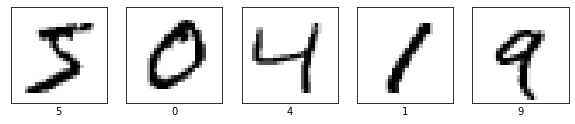

In [19]:
plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.savefig('mnist_handwritten.eps', format='eps', dpi=300)
plt.show()

In [9]:
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

In [11]:
x_train.shape

(60000, 28, 28, 1)

In [13]:
modele=tf.keras.Sequential()
modele.add(tf.keras.layers.Conv2D(16, (4, 4), activation='relu')) #32=dim espace de sortie, strides, prend les 28x28
modele.add(tf.keras.layers.MaxPooling2D((2, 2))) #reduction de la dimension spatiale en sortie de la couche de convolution, mise en commun
modele.add(tf.keras.layers.Flatten()) #écrasement en vecteur
modele.add(tf.keras.layers.Dense(10, activation='relu'))
modele.add(tf.keras.layers.Dense(10, activation='softmax')) #puis activation à 10 neurones puisque chiffres 1 à 10
opt = tf.keras.optimizers.SGD(lr=0.01)
loss = tf.keras.losses.SparseCategoricalCrossentropy()

In [14]:
modele.compile(opt, loss)

In [15]:
log_dir="logs\\modele\\"+datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [16]:
modele.fit(x_train, y_train, epochs=3, callbacks=[tensorboard_callback])

Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 25s 412us/sample - loss: 0.6878 - los
Epoch 2/3
60000/60000 [==============================] - 18s 303us/sample - loss: 0.3368
Epoch 3/3
60000/60000 [==============================] - 17s 287us/sample - loss: 0.2794


In [17]:
print(modele.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            multiple                  272       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 multiple                  0         
_________________________________________________________________
flatten_1 (Flatten)          multiple                  0         
_________________________________________________________________
dense_2 (Dense)              multiple                  23050     
_________________________________________________________________
dense_3 (Dense)              multiple                  110       
Total params: 23,432
Trainable params: 23,432
Non-trainable params: 0
_________________________________________________________________
None


In [22]:
modele.evaluate(x_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.2325455124437809

In [23]:
x=modele.predict(x_test)

In [20]:
x.shape

(10000, 10)

In [24]:
x

array([[6.7625674e-06, 2.0870368e-10, 3.4755385e-06, ..., 9.9966645e-01,
        2.4409896e-06, 1.7628701e-04],
       [2.4752766e-03, 1.2963103e-06, 9.9668080e-01, ..., 2.6664210e-08,
        1.7087952e-05, 6.9230595e-08],
       [3.8077742e-06, 9.7690797e-01, 6.7355195e-03, ..., 2.8001363e-03,
        7.2896923e-03, 5.1145926e-05],
       ...,
       [3.1190796e-06, 7.5360828e-07, 2.4100209e-05, ..., 1.8698542e-03,
        1.6407188e-03, 1.2693531e-02],
       [1.3115027e-04, 1.3013989e-05, 2.6232246e-06, ..., 2.2900165e-06,
        5.1308226e-02, 9.6375379e-07],
       [6.1569344e-06, 8.4361019e-14, 4.6191333e-05, ..., 9.3209240e-13,
        2.0445343e-07, 1.8350594e-09]], dtype=float32)

In [24]:
r=tf.keras.metrics.SparseCategoricalAccuracy()

In [25]:
r(y_test, x)

<tf.Tensor: id=13322, shape=(), dtype=float32, numpy=0.963>

In [12]:
%tensorboard --logdir logs/modele

ERROR: Timed out waiting for TensorBoard to start. It may still be running as pid 23212.

In [25]:
from tensorflow.python.client import device_lib

In [26]:
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 13032193737212470871]